## mqttPlotQakEvents.ipynb

connected to broker  mqtt.eclipseprojects.io
subscribing to unibo/sonar/events
collecting values; please wait ...
RECEIVED  msg(sonardata,event,sonar,none,distance(21.1),21)
RECEIVED  msg(sonardata,event,sonar,none,distance(20.8),22)
RECEIVED  msg(sonardata,event,sonar,none,distance(21.4),23)
RECEIVED  msg(sonardata,event,sonar,none,distance(21.0),24)
RECEIVED  msg(sonardata,event,sonar,none,distance(21.3),25)
RECEIVED  msg(sonardata,event,sonar,none,distance(21.2),26)
RECEIVED  msg(sonardata,event,sonar,none,distance(21.3),27)
RECEIVED  msg(sonardata,event,sonar,none,distance(21.1),28)
RECEIVED  msg(sonardata,event,sonar,none,distance(21.4),29)
RECEIVED  msg(sonardata,event,sonar,none,distance(21.0),30)
RECEIVED  msg(sonardata,event,sonar,none,distance(20.8),31)
RECEIVED  msg(sonardata,event,sonar,none,distance(21.1),32)
RECEIVED  msg(sonardata,event,sonar,none,distance(21.2),33)
RECEIVED  msg(sonardata,event,sonar,none,distance(21.4),34)
RECEIVED  msg(sonardata,event,sonar,none,dista

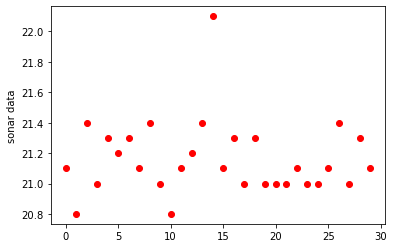

bye


In [5]:
import time
import paho.mqtt.client as paho
import matplotlib.pyplot as plt

brokerAddr="mqtt.eclipseprojects.io"  #"mqtt.eclipseprojects.io"  #"broker.hivemq.com" 
duration = 20
x        = []
d        = []
n        = 0
goon     = True
msgnum   = 0 
##############################################################
###  msg(sonarRobot,event,sonar,none,sonar(V),N)
##############################################################
def diagram() :
    global d
    plt.ylabel('sonar data')
    plt.plot(list(d), 'ro', color='red')
    plt.show()
    
def on_message(client, userdata, message) :   #define callback
    global msgnum,  x,y,z, goon
    if not goon :
        return
    evMsg   = str( message.payload.decode("utf-8")  )
    print("RECEIVED ", evMsg)
    msgitems = evMsg.split(",")
    if msgnum < 30  :
        msgnum = msgnum + 1
        vd = float( msgitems[4].split('(')[1].split(')')[0] )
        ## if msgnum % 10 == 0  :
        ##    print("evMsg=", evMsg, vd   )  
        d.append( vd )
    else  :
        #print("evMsg plot=", evMsg, "msgnum=",  msgitems[4] )
        diagram()
        goon = False
        client.disconnect()
    
client= paho.Client("receiver")      
client.on_message=on_message            # Bind function to callback

client.connect(brokerAddr)              #connect
print("connected to broker ", brokerAddr)
print("subscribing to unibo/sonar/events")
client.subscribe("unibo/sonar/events")      #subscribe

print("collecting values; please wait ..." )
client.loop_start()             #start loop to process received messages
time.sleep(duration)
client.disconnect()             #disconnect
print("bye")
client.loop_stop()              #stop loop    